In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import numpy as np



In [2]:
print("Loading dataset from online source...")
df = sns.load_dataset('tips')

Loading dataset from online source...


In [3]:
print("\n--- DATA PREVIEW ---")
display(df.head())
display(df.tail())


--- DATA PREVIEW ---


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
print("\n--- DATASET INFO ---")
print(df.info())


--- DATASET INFO ---
<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [5]:
#Central Tendency
bill = df['total_bill']

print("\n--- CENTRAL TENDENCY (Total Bill) ---")
print(f"Mean (Average):     ${bill.mean():.2f}")
print(f"Median (Middle):    ${bill.median():.2f}")
print(f"Mode (Most Freq):   ${bill.mode()[0]:.2f}")


--- CENTRAL TENDENCY (Total Bill) ---
Mean (Average):     $19.79
Median (Middle):    $17.80
Mode (Most Freq):   $13.42


In [6]:
# Interactive Visualization: Central Tendency
mean_val = df['total_bill'].mean()
median_val = df['total_bill'].median()
mode_val = df['total_bill'].mode()[0]

fig = go.Figure()
fig.add_trace(go.Histogram(x=df['total_bill'], name='Total Bill', opacity=0.7, marker_color='skyblue'))
fig.add_vline(x=mean_val, line_width=3, line_dash="dash", line_color="red", annotation_text=f"Mean: {mean_val:.2f}", annotation_position="top right")
fig.add_vline(x=median_val, line_width=3, line_dash="dash", line_color="green", annotation_text=f"Median: {median_val:.2f}", annotation_position="top left")
fig.add_vline(x=mode_val, line_width=3, line_dash="dash", line_color="blue", annotation_text=f"Mode: {mode_val:.2f}", annotation_position="bottom right")
fig.update_layout(title="Central Tendency: Mean vs Median vs Mode", xaxis_title="Total Bill", yaxis_title="Count")
fig.show()


In [7]:
#spread
print("\n--- DISPERSION (Total Bill) ---")
print(f"Range (Max - Min):  ${(bill.max() - bill.min()):.2f}")
print(f"Variance:           {bill.var():.2f}")
print(f"Std Deviation:      {bill.std():.2f}")

Q1 = bill.quantile(0.25)
Q3 = bill.quantile(0.75)
IQR = Q3 - Q1
print(f"IQR (Q3 - Q1):      {IQR:.2f}")


--- DISPERSION (Total Bill) ---
Range (Max - Min):  $47.74
Variance:           79.25
Std Deviation:      8.90
IQR (Q3 - Q1):      10.78


In [11]:
# Interactive Visualization: Dispersion (Box Plot)
fig = go.Figure()
fig.add_trace(go.Box(x=df['total_bill'], name='Total Bill', boxpoints='all', jitter=0.3, pointpos=-1.8, marker_color='lightgreen'))
fig.update_layout(title="Dispersion: Box Plot with Individual Points", xaxis_title="Total Bill")
fig.show()


In [8]:
#distribution
print("\n--- SHAPE (Total Bill) ---")
# Skewness: 0 = normal, >0 = right skewed, <0 = left skewed
print(f"Skewness:           {bill.skew():.3f}")
# Kurtosis: Measures 'tailedness'. Normal dist = 0 (Fisher definition used by Pandas)
print(f"Kurtosis:           {bill.kurt() - 3:.3f}")


--- SHAPE (Total Bill) ---
Skewness:           1.133
Kurtosis:           -1.782


In [12]:
# Interactive Visualization: Shape (Histogram vs Normal Curve)
mu, std = stats.norm.fit(df['total_bill'])
x_range = np.linspace(df['total_bill'].min(), df['total_bill'].max(), 100)
pdf = stats.norm.pdf(x_range, mu, std)

fig = go.Figure()
fig.add_trace(go.Histogram(x=df['total_bill'], histnorm='probability density', name='Observed Data', opacity=0.6, marker_color='orange'))
fig.add_trace(go.Scatter(x=x_range, y=pdf, mode='lines', name='Normal Distribution', line=dict(color='red', width=2)))
fig.update_layout(title=f"Shape Analysis: Skewness={df['total_bill'].skew():.2f}, Kurtosis={df['total_bill'].kurt():.2f}", xaxis_title="Total Bill", yaxis_title="Probability Density")
fig.show()


In [9]:
#categorical
print("\n--- CATEGORICAL BREAKDOWN (Day of Week) ---")
print(df['day'].value_counts())
print("\n--- PROPORTIONS (%) ---")
print(df['day'].value_counts(normalize=True) * 100)


--- CATEGORICAL BREAKDOWN (Day of Week) ---
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

--- PROPORTIONS (%) ---
day
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: proportion, dtype: float64


In [13]:
# Interactive Visualization: Categorical Breakdown
counts = df['day'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values, hole=.3)])
fig.update_layout(title="Categorical Breakdown: Day of Week")
fig.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7032\3075556133.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




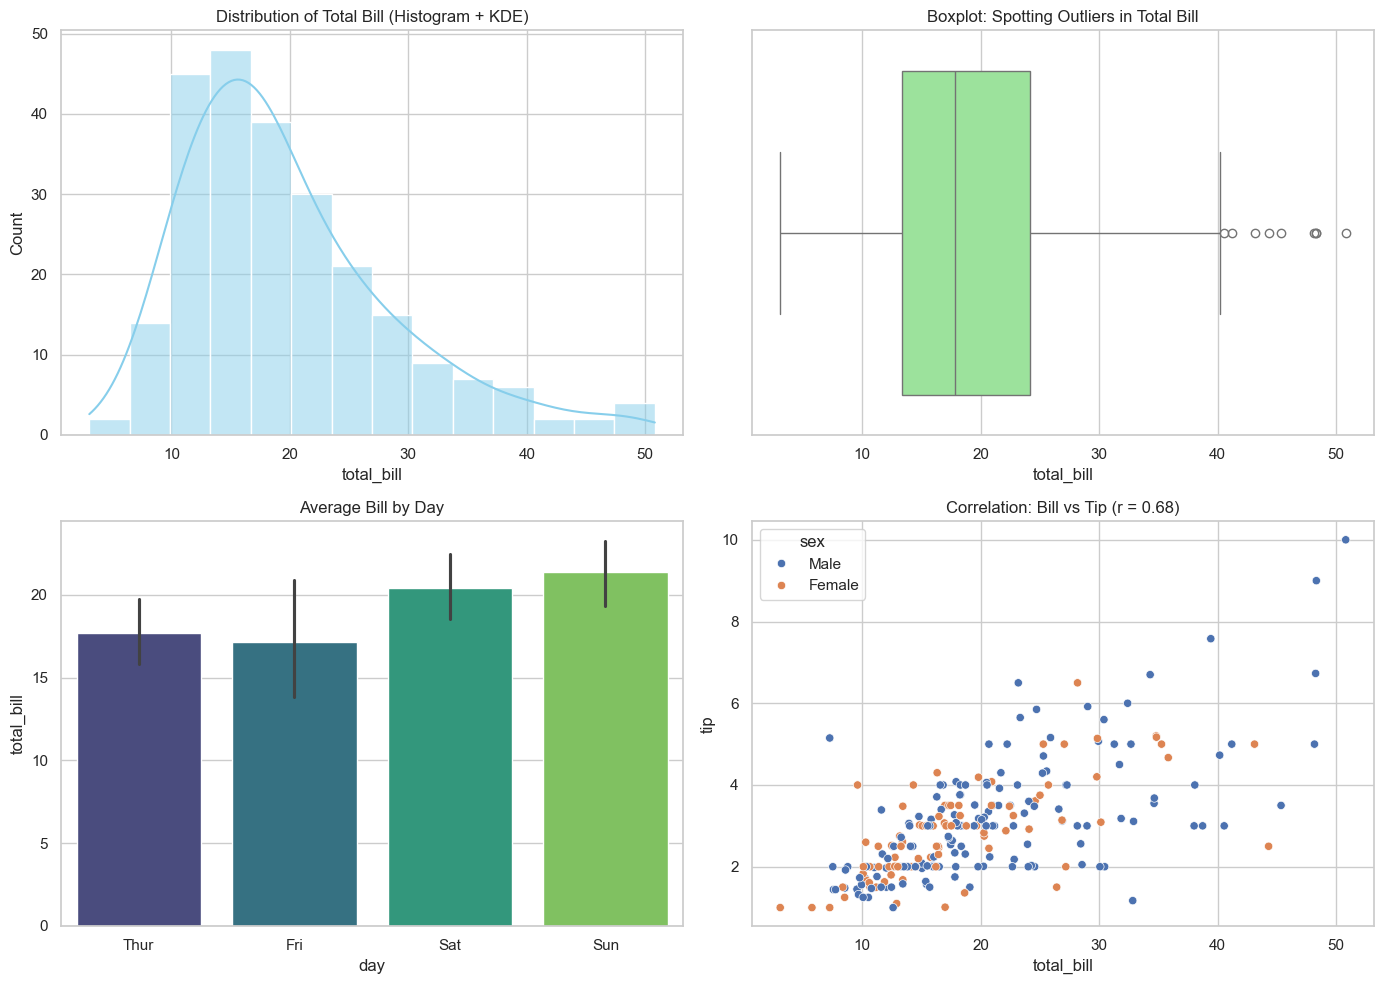

In [10]:
#some visualization
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# A. Histogram (Distribution)
sns.histplot(df['total_bill'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Bill (Histogram + KDE)')

# B. Boxplot (Outliers & Spread)
sns.boxplot(x=df['total_bill'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot: Spotting Outliers in Total Bill')

# C. Bar Plot (Categorical Comparison)
sns.barplot(x='day', y='total_bill', data=df, estimator=np.mean, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Average Bill by Day')

# D. Scatter Plot (Correlation: Bill vs Tip)
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df, ax=axes[1, 1])
axes[1, 1].set_title(f'Correlation: Bill vs Tip (r = {df["total_bill"].corr(df["tip"]):.2f})')

plt.tight_layout()
plt.show()